In [5]:
import pandas as pd
import altair as alt 
from pathlib import Path
alt.renderers.enable('notebook');

srcpath = Path('datastash', 'sfpd-incidents-annual.csv')

# filter out incomplete year of 2018
df = pd.read_csv(srcpath).query('(year < 2018)')
df.head()


,year,PdDistrict,Category,Descript,incident_count
0,2003,BAYVIEW,ARSON,ARSON,2
1,2003,BAYVIEW,ARSON,ARSON OF A COMMERCIAL BUILDING,1
2,2003,BAYVIEW,ARSON,ARSON OF A POLICE VEHICLE,1
3,2003,BAYVIEW,ARSON,ARSON OF A VEHICLE,80
4,2003,BAYVIEW,ARSON,ARSON OF AN INHABITED DWELLING,9


In [8]:
ydf = df.groupby('year', as_index=False).sum()
ydf


,year,incident_count
0,2003,149176
1,2004,148148
2,2005,142186
3,2006,137853
4,2007,137639
5,2008,141311
6,2009,139860
7,2010,133523
8,2011,132697
9,2012,140847


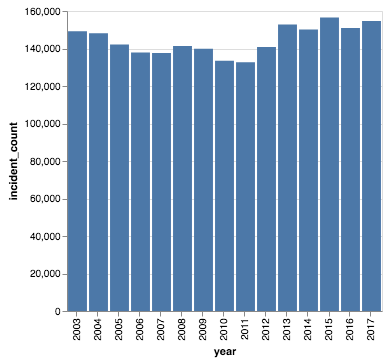

In [9]:
alt.Chart(ydf).mark_bar().encode(x='year:O', y='incident_count:Q')

## By category and year

In [10]:
aggdf = df.groupby(['year', 'Category'], as_index=False).sum()
aggdf.head()

,year,Category,incident_count
0,2003,ARSON,293
1,2003,ASSAULT,13461
2,2003,BAD CHECKS,134
3,2003,BRIBERY,28
4,2003,BURGLARY,6047


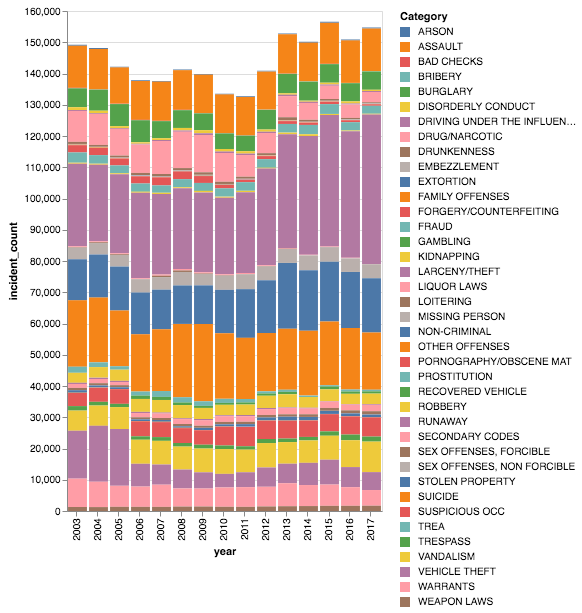

In [15]:
# messy stacked bar
alt.Chart(aggdf).mark_bar().encode(x='year:O', y='incident_count', color='Category').configure_view(width=700, height=500)

In [25]:
major_cats = aggdf.query('(incident_count > 1000) & (year == 2010)')['Category']
major_cats

263                   ASSAULT
266                  BURGLARY
269             DRUG/NARCOTIC
274    FORGERY/COUNTERFEITING
275                     FRAUD
278             LARCENY/THEFT
281            MISSING PERSON
282              NON-CRIMINAL
283            OTHER OFFENSES
285              PROSTITUTION
287                   ROBBERY
289           SECONDARY CODES
294            SUSPICIOUS OCC
296                  TRESPASS
297                 VANDALISM
298             VEHICLE THEFT
299                  WARRANTS
300               WEAPON LAWS
Name: Category, dtype: object

In [26]:
xdf = aggdf[aggdf['Category'].isin(major_cats)]
xdf.head(25)

,year,Category,incident_count
1,2003,ASSAULT,13461
4,2003,BURGLARY,6047
7,2003,DRUG/NARCOTIC,9917
12,2003,FORGERY/COUNTERFEITING,2320
13,2003,FRAUD,3285
16,2003,LARCENY/THEFT,26393
19,2003,MISSING PERSON,3699
20,2003,NON-CRIMINAL,13149
21,2003,OTHER OFFENSES,21232
23,2003,PROSTITUTION,1952


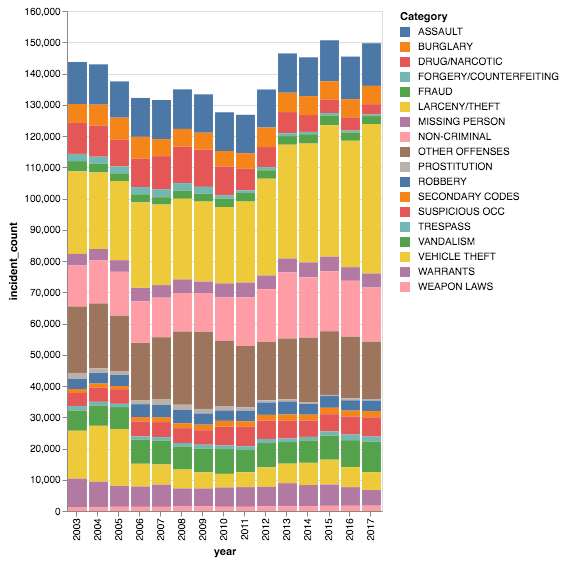

In [27]:
alt.Chart(xdf).mark_bar().encode(x='year:O', y='incident_count', color='Category').configure_view(width=700, height=500)

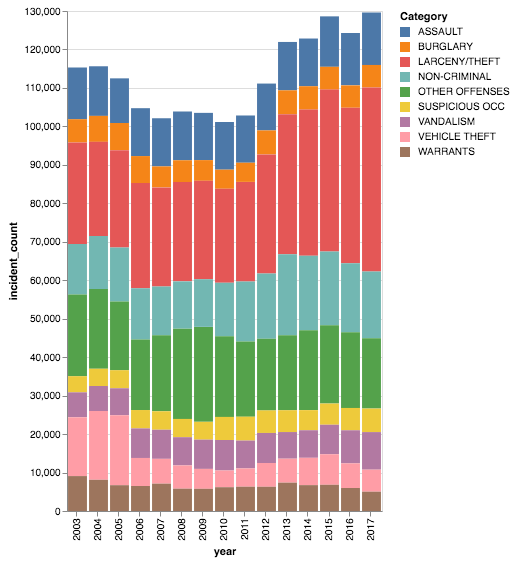

In [33]:
major_cats = aggdf.query('(incident_count > 5000) & (year == 2017)')['Category']
xdf = aggdf[aggdf['Category'].isin(major_cats)]
alt.Chart(xdf).mark_bar().encode(x='year:O', y='incident_count', color='Category').configure_view(width=700, height=500)

In [79]:
# top 10 crimes in 2003
major_cats = aggdf.query('(year == 2003)').sort_values(by='incident_count', ascending=False)[0:5]
major_cats
list(major_cats['Category'])

['LARCENY/THEFT', 'OTHER OFFENSES', 'VEHICLE THEFT', 'ASSAULT', 'NON-CRIMINAL']

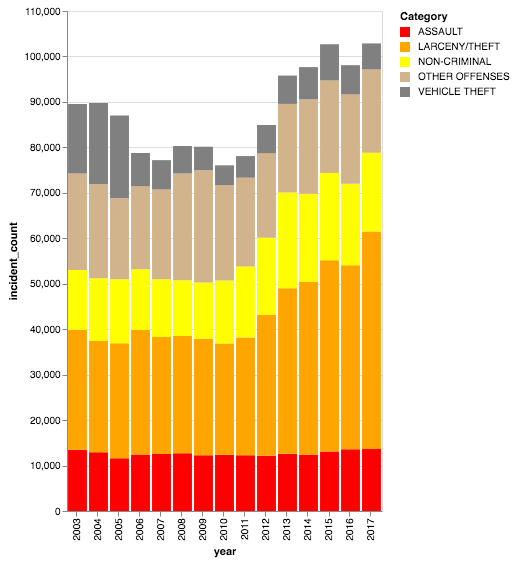

In [89]:
xdf = aggdf[aggdf['Category'].isin(major_cats['Category'])]
colscale = alt.Scale(domain=list(major_cats['Category']), range=['red', 'orange', 'yellow', 'tan', 'gray'])
# colscale = alt.Scale(scheme='category20b')
colcode = alt.Color('Category:N',
                    scale=colscale)

alt.Chart(xdf).mark_bar().encode(x='year:O', y='incident_count', color=colcode,
                                 order='Category:O'
                                ).configure_view(width=700, height=500)


# TK custom sort by facet may not be doable
# https://github.com/vega/vega-lite/issues/2915
# https://github.com/vega/vega-lite/issues/1734
# https://github.com/altair-viz/altair/issues/397
# https://github.com/vega/vega-lite/issues/3681

## Looking at drug crimes

Arrests dropped drastically in 2012

https://www.wsj.com/articles/SB10000872396390444226904577559243414878630

> The department also attributes the decline in narcotics arrests to a 10% staffing reduction during the past two years and a $600,000 cut in state and federal grants earmarked for drug enforcement.




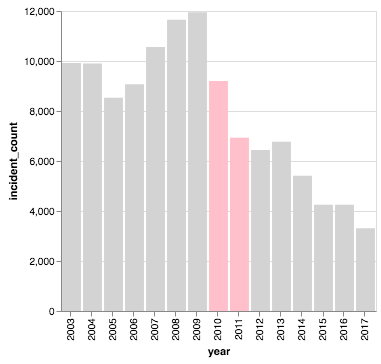

In [125]:
drugdf = df.query('(Category == "DRUG/NARCOTIC")')
aggdf = drugdf.groupby('year', as_index=False).sum()
HI_YEARS = [2010, 2011]
ALT_CONDITION = 'indexof({}, datum.year) >= 0'.format(HI_YEARS)
chart = alt.Chart(aggdf).mark_bar().encode(x='year:O', y='incident_count',
                            color=alt.condition(ALT_CONDITION, 
                                                    alt.value('pink'), alt.value('lightgray')))

chart

In [144]:
# Filtering for possession

In [133]:
aggdf = drugdf.groupby(['Descript'], as_index=False)['Descript', 'incident_count'].sum().sort_values(by=['incident_count'], ascending=[False])
aggdf

,Descript,incident_count
40,POSSESSION OF NARCOTICS PARAPHERNALIA,22517
24,POSSESSION OF BASE/ROCK COCAINE,14321
34,POSSESSION OF MARIJUANA,11841
50,SALE OF BASE/ROCK COCAINE,9060
36,POSSESSION OF METH-AMPHETAMINE,8614
25,POSSESSION OF BASE/ROCK COCAINE FOR SALE,7859
35,POSSESSION OF MARIJUANA FOR SALES,5941
32,POSSESSION OF HEROIN,4494
28,POSSESSION OF CONTROLLED SUBSTANCE,4480
26,POSSESSION OF COCAINE,3186


In [149]:
toptypes = drugdf[drugdf['Descript'].str.startswith('POSSESSION OF')
              ].groupby(['Descript'], as_index=False)['Descript', 'incident_count'].sum().sort_values(by=['incident_count'], ascending=[False])

toptypes = toptypes[0:15]
toptypes


,Descript,incident_count
20,POSSESSION OF NARCOTICS PARAPHERNALIA,22517
4,POSSESSION OF BASE/ROCK COCAINE,14321
14,POSSESSION OF MARIJUANA,11841
16,POSSESSION OF METH-AMPHETAMINE,8614
5,POSSESSION OF BASE/ROCK COCAINE FOR SALE,7859
15,POSSESSION OF MARIJUANA FOR SALES,5941
12,POSSESSION OF HEROIN,4494
8,POSSESSION OF CONTROLLED SUBSTANCE,4480
6,POSSESSION OF COCAINE,3186
17,POSSESSION OF METH-AMPHETAMINE FOR SALE,2849


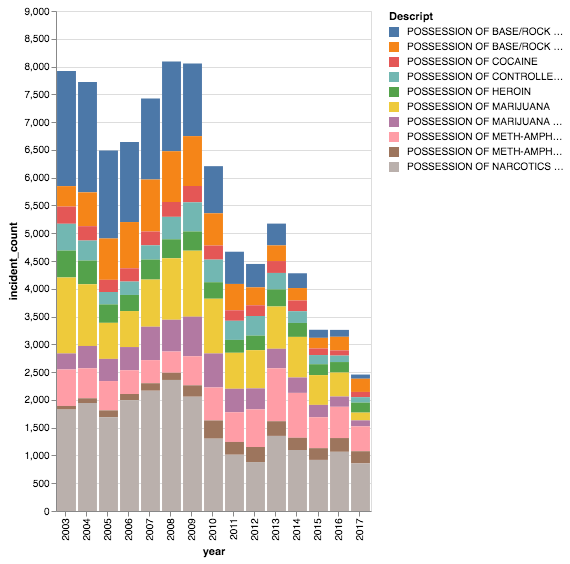

In [147]:
xdf = drugdf[drugdf['Descript'].isin(toptypes['Descript'])]
xdf = xdf.groupby(['year', 'Descript'], as_index=False).sum()
alt.Chart(xdf).mark_bar().encode(x='year:O', y='incident_count', color='Descript').configure_view(width=700, height=500)

In [168]:

# xdf = drugdf[drugdf['Descript'].isin(toptypes['Descript'])].copy()
xdf = drugdf[drugdf['Descript'].str.startswith('POSSESSION OF')].copy()
       
xdf['maintype'] = 'Other'
xdf.loc[xdf['Descript'].str.contains('MARIJUANA'), 'maintype'] = 'Marijuana'
xdf.loc[xdf['Descript'].str.contains('COCAINE'), 'maintype'] = 'Cocaine'
xdf.loc[xdf['Descript'].str.contains('HEROIN'), 'maintype'] = 'Heroin'
xdf.loc[xdf['Descript'].str.contains('PARA'), 'maintype'] = 'Paraphernalia'
xdf.loc[xdf['Descript'].str.contains('METH'), 'maintype'] = 'Meth'
xdf.loc[xdf['Descript'].str.contains('AMPH'), 'maintype'] = 'Meth'
xdf.head(10)


,year,PdDistrict,Category,Descript,incident_count,maintype
81,2003,BAYVIEW,DRUG/NARCOTIC,POSSESSION OF AMPHETAMINE,3,Meth
82,2003,BAYVIEW,DRUG/NARCOTIC,POSSESSION OF AMPHETAMINE FOR SALES,2,Meth
83,2003,BAYVIEW,DRUG/NARCOTIC,POSSESSION OF BASE/ROCK COCAINE,242,Cocaine
84,2003,BAYVIEW,DRUG/NARCOTIC,POSSESSION OF BASE/ROCK COCAINE FOR SALE,49,Cocaine
85,2003,BAYVIEW,DRUG/NARCOTIC,POSSESSION OF COCAINE,44,Cocaine
86,2003,BAYVIEW,DRUG/NARCOTIC,POSSESSION OF COCAINE FOR SALES,12,Cocaine
87,2003,BAYVIEW,DRUG/NARCOTIC,POSSESSION OF CONTROLLED SUBSTANCE,36,Other
88,2003,BAYVIEW,DRUG/NARCOTIC,POSSESSION OF CONTROLLED SUBSTANCE FOR SALE,2,Other
89,2003,BAYVIEW,DRUG/NARCOTIC,POSSESSION OF HALLUCINOGENIC,2,Other
90,2003,BAYVIEW,DRUG/NARCOTIC,POSSESSION OF HEROIN,75,Heroin


In [217]:
aggdf = xdf[['maintype', 'incident_count']
            ].groupby('maintype', as_index=False
            ).sum().sort_values('incident_count', ascending=False)

aggdf

,maintype,incident_count
0,Cocaine,26793
5,Paraphernalia,22517
2,Marijuana,17782
3,Meth,12619
4,Other,8086
1,Heroin,6691


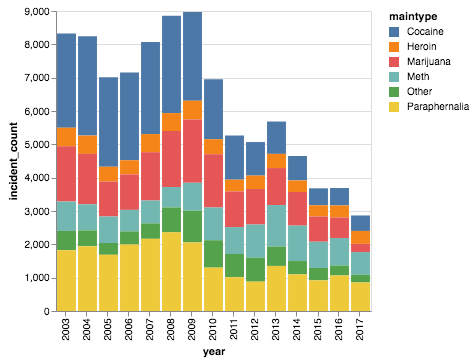

In [227]:
# charting without specifying order of stacks
ydf = xdf.groupby(['maintype', 'year'], as_index=False
            ).sum()

alt.Chart(ydf).mark_bar().encode(x='year:O', y='incident_count', color='maintype')



## Specifying the order of stacks with a calculation hack

Basically, calculate a new field for which order will be specified. I created a whole new dataframe and merged it:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html

Vegadocs say there is a better implementation in the future, but suggest using calculate-transform: https://vega.github.io/vega-lite/docs/stack.html#order




In [233]:

ordf = xdf.groupby('maintype', as_index=False
                  ).sum().sort_values('incident_count', ascending=False)
ordf = ordf['maintype'].reset_index(drop=True).to_frame()
ordf['order_index'] = ordf.index
ordf


,maintype,order_index
0,Cocaine,0
1,Paraphernalia,1
2,Marijuana,2
3,Meth,3
4,Other,4
5,Heroin,5


In [234]:
# from before
ydf = xdf.groupby(['maintype', 'year'], as_index=False
            ).sum()

# now merge
ydf = ydf.merge(ordf, on='maintype')
ydf.head()

,maintype,year,incident_count,order_index
0,Cocaine,2003,2824,0
1,Cocaine,2004,2980,0
2,Cocaine,2005,2684,0
3,Cocaine,2006,2634,0
4,Cocaine,2007,2764,0


### the beauty of stack ordering

Now you can see how dramatically cocaine arrests change

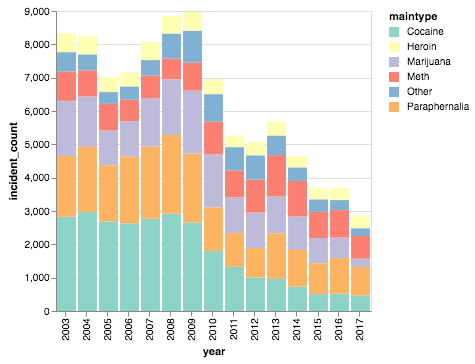

In [246]:
alt.Chart(ydf).mark_bar().encode(x='year:O', y='incident_count', 
                                 color=alt.Color('maintype:O', scale=alt.Scale(scheme='set3')), 
                                  order=alt.Order('order_index:O', sort='ascending')
                                )

## Stacked proportional bar (normalized)

https://altair-viz.github.io/gallery/normalized_stacked_bar_chart.html

Easier to see which types of crimes have had an uptick in reports



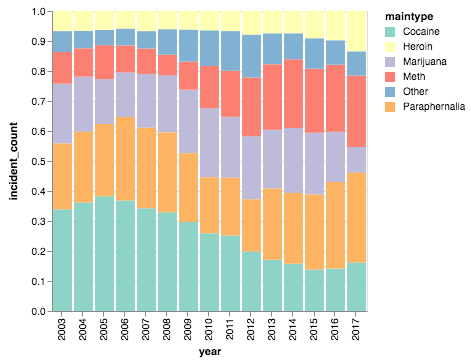

In [247]:
_ycode = alt.Y('incident_count', stack='normalize')

alt.Chart(ydf).mark_bar().encode(x='year:O', y=_ycode, 
                                 color=alt.Color('maintype:O', scale=alt.Scale(scheme='set3')), 
                                 order=alt.Order('order_index:O', sort='ascending'),
                                )